# Credit Risk Modelling in Python

<img src="Linear_reg_log_reg.png" alt="drawing" width="400"/>

Linear regression: The dependant variable equals a linear combination of the independent variables, plus an error term.

Logistic regression: The probability of an event can be represented as the exponential of a linear combination of independent variables and coefficients divided by one plus the same exponential.

<img src="odds.png" alt="drawing" width="400"/>

If we divide the probability of ocurring the event by the probability of the event nor ocurring, then we have the exponential linear combination. This is called "odds" and can be interpreted as the ratio of the probability of one event to that of an alternative event.

<img src="ln_odds.png" alt="drawing" width="400"/>

If we apply the natural logarithm (ln: log with base e) on both sides, we can say that the ln of the odds is equal to the same linear model of the linear regression.

In our PD Model, all of the independent variables are dummy variables (0 or 1). This means that the coefficient for such a variable shows the exact difference in logarithm of odd's units between an observation for which the dummy variable equals 1 and an observation for which the dummy variable equals 0.

<img src="substraction.png" alt="drawing" width="400"/>

<img src="substraction2.png" alt="drawing" width="400"/>

<img src="log_prop.png" alt="drawing" width="400"/>

<img src="exp_log_odds.png" alt="drawing" width="400"/>

So, the ratio of odds of an event ocurring for an observation with the dummy variable having a value of 1 to the observation with the dummy variable having a value of zero equals an exponent to the power of the regression coefficient of the dummy variable.

Example to interpret logistic regression coefficients:

<img src="example_log_reg_1.png" alt="drawing" width="400"/>

<img src="example_log_reg_2.png" alt="drawing" width="400"/>

<img src="example_log_reg_3.png" alt="drawing" width="400"/>

## Import libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import linear_model
import scipy.stats as stat

import pickle

## Loading the data and selecting the features

### Import data

In [20]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None)

### Explore data

In [21]:
loan_data_targets_train.shape

(373028, 1)

In [22]:
loan_data_inputs_train.shape

(373028, 327)

In [23]:
loan_data_targets_test.shape

(93257, 1)

In [24]:
loan_data_inputs_test.shape

(93257, 327)

#### Selecting the features

In [25]:
features_list = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']

In [26]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , features_list]

In [27]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [28]:
# We drop 1 category from each variable
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


### PD Model Estimation

#### Logistic Regression

In [29]:
reg = LogisticRegression(max_iter = 300)

In [30]:
pd.options.display.max_rows = None

In [31]:
reg.fit(inputs_train, loan_data_targets_train[1])

LogisticRegression(max_iter=300)

In [32]:
reg.intercept_

array([-1.90246605])

In [33]:
reg.coef_

array([[ 1.11908868,  0.88050463,  0.68653882,  0.49880252,  0.32370823,
         0.13566947,  0.09140225,  0.10684895,  0.03766174,  0.05962072,
         0.06045688,  0.06291187,  0.078983  ,  0.13647666,  0.1009159 ,
         0.18536028,  0.24072276,  0.22472325,  0.26327872,  0.32151868,
         0.52322961,  0.08828983, -0.01067143,  0.30515057,  0.20168809,
         0.21456042,  0.26750653,  0.05388098,  0.07954766,  0.10078238,
         0.12564938,  0.09073263,  0.06068383,  0.12333362,  1.07247662,
         0.87215883,  0.77147773,  0.57032621,  0.40870134,  0.16355973,
        -0.07233293,  0.88107604,  0.55507646,  0.30364122,  0.11153408,
         0.05609129,  0.03774765,  0.07874704,  0.11947856,  0.12505196,
         0.0939672 ,  0.05163169,  0.67370044,  0.52996871,  0.32060167,
         0.49004247,  0.3936704 ,  0.36756129,  0.35122454,  0.34881642,
         0.37773928,  0.29196097,  0.12234292,  0.1676797 , -0.02005792,
         0.02695126,  0.20666271,  0.04254541,  0.0

In [34]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.902466
1,grade:A,1.119089
2,grade:B,0.880505
3,grade:C,0.686539
4,grade:D,0.498803
5,grade:E,0.323708
6,grade:F,0.135669
7,home_ownership:OWN,0.091402
8,home_ownership:MORTGAGE,0.106849
9,addr_state:NM_VA,0.037662


#### Build a logistic regression model with p-values

In [147]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [148]:
reg = LogisticRegression_with_p_values(max_iter = 300)

In [149]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/fernando.garade/opt/anaconda3/envs/credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.918281
1,grade:A,1.121797
2,grade:B,0.882978
3,grade:C,0.688987
4,grade:D,0.501103
5,grade:E,0.325821
6,grade:F,0.137681
7,home_ownership:OWN,0.091427
8,home_ownership:MORTGAGE,0.106883
9,addr_state:NM_VA,0.038242


In [151]:
p_values = reg.p_values

In [152]:
p_values = np.append(np.nan, np.array(p_values))

In [153]:
summary_table['p_values'] = p_values

In [154]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.918281,NaN
1,grade:A,1.121797,5.576535e-35
2,grade:B,0.882978,3.027541e-47
3,grade:C,0.688987,5.633742e-34
4,grade:D,0.501103,1.303990e-20
5,grade:E,0.325821,1.284639e-11
6,grade:F,0.137681,6.064629e-03
7,home_ownership:OWN,0.091427,5.893577e-06
8,home_ownership:MORTGAGE,0.106883,3.937853e-17
9,addr_state:NM_VA,0.038242,2.330914e-01


If all of the categories of an independent variable are not statistically significant (> 0.05), then we can drop this variable completely. If at least 1 category for a variable is significant, then we must keep all categories of that variable.

All categories for these variables de are not statistically significant, therefore we can drop them entirely:
- delinq_2yrs
- pub_rec
- open_acc
- total_rev_hi_lim
- total_acc

In [10]:
features_list_final = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , features_list_final]

In [18]:
with open("features_list_final", "wb") as fp:
    pickle.dump(features_list_final, fp)

In [14]:
ref_categories_final = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [15]:
with open("ref_categories_final", "wb") as fp:
    pickle.dump(ref_categories_final, fp)

In [16]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [17]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories_final, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [159]:
reg2 = LogisticRegression_with_p_values(max_iter = 300)
reg2.fit(inputs_train, loan_data_targets_train)

/Users/fernando.garade/opt/anaconda3/envs/credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [160]:
feature_name = inputs_train.columns.values

In [161]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.426815
1,grade:A,1.117999
2,grade:B,0.879865
3,grade:C,0.686566
4,grade:D,0.499313
5,grade:E,0.324869
6,grade:F,0.137144
7,home_ownership:OWN,0.093548
8,home_ownership:MORTGAGE,0.105961
9,addr_state:NM_VA,0.037700


In [162]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.426815,NaN
1,grade:A,1.117999,8.013378e-35
2,grade:B,0.879865,3.142727e-47
3,grade:C,0.686566,4.264410e-34
4,grade:D,0.499313,8.424828e-21
5,grade:E,0.324869,6.008254e-12
6,grade:F,0.137144,5.188976e-03
7,home_ownership:OWN,0.093548,3.424822e-06
8,home_ownership:MORTGAGE,0.105961,5.355865e-17
9,addr_state:NM_VA,0.037700,2.390660e-01


In [163]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

#### Interpretation of coefficient values
Each reference category of each variable has a regression coefficient of 0 and each regression coefficient's value is relative to this reference category (positive are better, negative are worser than the reference category). 

Example with variable grade:

The ratio of odds for someone with external rating D to someone with external grade G is the exponent raised to the grade G regression coefficient.

<img src="example_coef.png" alt="drawing" width="400"/>

<img src="example_coef_2.png" alt="drawing" width="400"/>

So, the odds for someone with a rating of D to be a good borrower are about 1.65 times greater than the odds for someone with a rating of G.

## PD Model Validation (Test)

### Out-of-sample validation (test)

In [164]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [165]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [166]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [167]:
y_hat_test = reg2.model.predict(inputs_test)

In [168]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

<img src="predict_expl.png" alt="drawing" width="1000"/>

The default cut-off is 0.5. Therefore:
- When the estimated probability <= 50% -> 0
- When the estimated probability > 50% -> 1

In [169]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [170]:
y_hat_test_proba

array([[0.07586062, 0.92413938],
       [0.15166964, 0.84833036],
       [0.11439684, 0.88560316],
       ...,
       [0.02677902, 0.97322098],
       [0.04025101, 0.95974899],
       [0.04763147, 0.95236853]])

The first component of each element is the probability of default (PD) and the second one is the probability of non-default or the probability of being a good borrower.

In [171]:
# We keep only the prob of being a good borrower
y_hat_test_proba[: ][: , 1]

array([0.92413938, 0.84833036, 0.88560316, ..., 0.97322098, 0.95974899,
       0.95236853])

In [172]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [173]:
y_hat_test_proba

array([0.92413938, 0.84833036, 0.88560316, ..., 0.97322098, 0.95974899,
       0.95236853])

In [174]:
loan_data_targets_test_temp = loan_data_targets_test

In [175]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [176]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [177]:
df_actual_predicted_probs.shape

(93257, 2)

In [178]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [179]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [180]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924139
288564,1,0.848330
213591,1,0.885603
263083,1,0.940574
165001,1,0.968696


### Accuracy and area under the curve

In [181]:
tr = 0.9 #try with different tr. The default 0.5 generates lots of false positives
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [182]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35821,47246


In [183]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.384111,0.506621


In [184]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5857040222181713

In [185]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99267557, 0.99267557, 0.99074245, ..., 0.48829856, 0.38762689,
        0.36584411]))

The roc_curve function returns 3 arrays. These arrays are:
1. False Positive Rate
2. True Positive Rate
3. Thresholds

In [186]:
sns.set()

In [187]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC Curve')

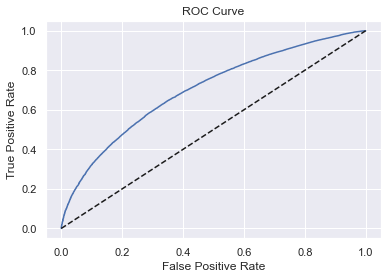

In [188]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k') # Benchmark: Predicting randomly
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

The Area under the curve (AUC) is the area under our curve defined by our model. The AUC for the benchmark is 50%.

In [189]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022256771503353

### Evaluation of model performance

#### Gini coefficient

<img src="gini.png" alt="drawing" width="600"/>
The Gini coefficient is measured by plotting the cumulative proportion of defaulted or bad borrowers as a function of the cumulative proportion of all borrowers.

Prerequisite: The borrowers must be in ascending order by estimated probability of being good from the PD model.

The Gini coefficient is the percentage of the area above the diagonal line and close between this concave curve and the diagonal. The greater the area, the greater the model.

In [190]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.365844,0
42344,1,0.384526,0
39810,0,0.387627,0
40518,0,0.443415,0
42396,0,0.453067,0


In [191]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991261,1
231463,1,0.991309,1
239228,1,0.991659,1
261086,1,0.992085,1
242624,1,0.992676,1


In [192]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [193]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.365844,0
1,42344,1,0.384526,0
2,39810,0,0.387627,0
3,40518,0,0.443415,0
4,42396,0,0.453067,0


In [194]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] =  df_actual_predicted_probs.loan_data_targets_test.cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Cumulative N Good']

In [195]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.365844,0,1,1,0
1,42344,1,0.384526,0,2,2,0
2,39810,0,0.387627,0,3,2,1
3,40518,0,0.443415,0,4,2,2
4,42396,0,0.453067,0,5,2,3


In [196]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population']/(df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good']  / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [197]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.365844,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.384526,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.387627,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.443415,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.453067,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

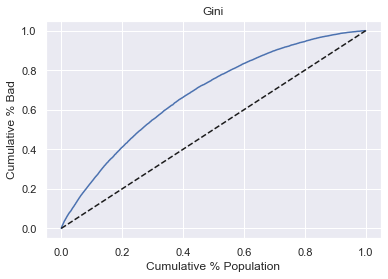

In [198]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

<img src="gini_auc.png" alt="drawing" width="200"/>

In [199]:
Gini = AUROC * 2 - 1
Gini

0.4044513543006707

#### Kolmogorov-Smirnov coefficient

<img src="KS_coef.png" alt="drawing" width="400"/>

The KS coefficient shows to what exent the model separates the actual good borrowers from the actual bad borrowers and it is measured looking at the cumulative distributions of these groups with respect to the estimated probabilities of being good and bad.

The KS coefficient is the maximum difference between the cumulative distribution of good and bad borrowers. The greater this difference, the better the model.

A perfect model would achieve a distance of 1 and a model that predicts randomly would achieve no distance (0).

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

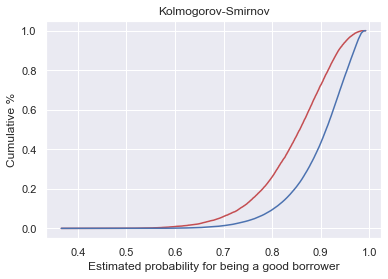

In [200]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated probability for being a good borrower')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [201]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2968333388209404

So, 0.3 is not as great as 1, but is significantly different to 0. We can see also in the graphic that the two cumulative distribution functions are sufficiently far away from each other and the model has satisfactory predictive power.

## Applying the PD model

### Calculating PD of individual accounts

In [202]:
pd.options.display.max_columns = None

In [203]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [204]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.426815,NaN
1,grade:A,1.117999,8.013378e-35
2,grade:B,0.879865,3.142727e-47
3,grade:C,0.686566,4.264410e-34
4,grade:D,0.499313,8.424828e-21
5,grade:E,0.324869,6.008254e-12
6,grade:F,0.137144,5.188976e-03
7,home_ownership:OWN,0.093548,3.424822e-06
8,home_ownership:MORTGAGE,0.105961,5.355865e-17
9,addr_state:NM_VA,0.037700,2.390660e-01


### Creating a scorecard

In [205]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.426815,NaN
1,grade:A,1.117999,8.013378e-35
2,grade:B,0.879865,3.142727e-47
3,grade:C,0.686566,4.264410e-34
4,grade:D,0.499313,8.424828e-21
5,grade:E,0.324869,6.008254e-12
6,grade:F,0.137144,5.188976e-03
7,home_ownership:OWN,0.093548,3.424822e-06
8,home_ownership:MORTGAGE,0.105961,5.355865e-17
9,addr_state:NM_VA,0.037700,2.390660e-01


In [206]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length_int:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [207]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard.reset_index(inplace=True)
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.426815,NaN
1,1,grade:A,1.117999,8.013378e-35
2,2,grade:B,0.879865,3.142727e-47
3,3,grade:C,0.686566,4.264410e-34
4,4,grade:D,0.499313,8.424828e-21
5,5,grade:E,0.324869,6.008254e-12
6,6,grade:F,0.137144,5.188976e-03
7,7,home_ownership:OWN,0.093548,3.424822e-06
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17
9,9,addr_state:NM_VA,0.037700,2.390660e-01


In [208]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].replace(to_replace = ':.*', value='', regex=True)

In [209]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.426815,NaN,Intercept
1,1,grade:A,1.117999,8.013378e-35,grade
2,2,grade:B,0.879865,3.142727e-47,grade
3,3,grade:C,0.686566,4.264410e-34,grade
4,4,grade:D,0.499313,8.424828e-21,grade
5,5,grade:E,0.324869,6.008254e-12,grade
6,6,grade:F,0.137144,5.188976e-03,grade
7,7,home_ownership:OWN,0.093548,3.424822e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17,home_ownership
9,9,addr_state:NM_VA,0.037700,2.390660e-01,addr_state


In [210]:
min_score = 300
max_score = 850
# Typical min and max scores for FICO

In [211]:
df_scorecard.groupby(by='Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.426815
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.074736
dti                            0.000000
emp_length_int                 0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.075964
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.010932
Name: Coefficients, dtype: float64

In [212]:
min_sum_coef = df_scorecard.groupby(by='Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5884468411395007

In [213]:
df_scorecard.groupby(by='Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.426815
acc_now_delinq                 0.197482
addr_state                     0.523957
annual_inc                     0.566467
dti                            0.386035
emp_length_int                 0.125486
grade                          1.117999
home_ownership                 0.105961
initial_list_status            0.054379
inq_last_6mths                 0.689558
int_rate                       0.892167
mths_since_earliest_cr_line    0.127879
mths_since_issue_d             1.076511
mths_since_last_delinq         0.191416
mths_since_last_record         0.517260
purpose                        0.302156
term                           0.079033
verification_status            0.085991
Name: Coefficients, dtype: float64

In [214]:
max_sum_coef = df_scorecard.groupby(by='Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.612922638004397

In [215]:
# The variable score is calculated as:
# Variable_score = variable_coef * ((max_score-min_score) / (max_sum_coef-min_sum_coef))
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * ((max_score-min_score)/(max_sum_coef-min_sum_coef))
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.426815,NaN,Intercept,-108.972092
1,1,grade:A,1.117999,8.013378e-35,grade,85.386462
2,2,grade:B,0.879865,3.142727e-47,grade,67.199131
3,3,grade:C,0.686566,4.264410e-34,grade,52.436033
4,4,grade:D,0.499313,8.424828e-21,grade,38.134687
5,5,grade:E,0.324869,6.008254e-12,grade,24.811683
6,6,grade:F,0.137144,5.188976e-03,grade,10.474293
7,7,home_ownership:OWN,0.093548,3.424822e-06,home_ownership,7.144662
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17,home_ownership,8.092738
9,9,addr_state:NM_VA,0.037700,2.390660e-01,addr_state,2.879279


In [216]:
# The intercept score is calculated as:
# intercept_score = ((intercept_coef - min_sum_coef) / (max_sum_coef-min_sum_coef))
#                   * (max_score-min_score)
#                   + min_score
df_scorecard['Score - Calculation'][0] = (((df_scorecard['Coefficients'][0]-min_sum_coef) / (max_sum_coef-min_sum_coef)) * (max_score-min_score)) + min_score 


/var/folders/4l/vbj9_p3x23z6pdkww_32n04c0000gp/T/ipykernel_1753/356363376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = (((df_scorecard['Coefficients'][0]-min_sum_coef) / (max_sum_coef-min_sum_coef)) * (max_score-min_score)) + min_score


In [217]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.426815,NaN,Intercept,312.344523
1,1,grade:A,1.117999,8.013378e-35,grade,85.386462
2,2,grade:B,0.879865,3.142727e-47,grade,67.199131
3,3,grade:C,0.686566,4.264410e-34,grade,52.436033
4,4,grade:D,0.499313,8.424828e-21,grade,38.134687
5,5,grade:E,0.324869,6.008254e-12,grade,24.811683
6,6,grade:F,0.137144,5.188976e-03,grade,10.474293
7,7,home_ownership:OWN,0.093548,3.424822e-06,home_ownership,7.144662
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17,home_ownership,8.092738
9,9,addr_state:NM_VA,0.037700,2.390660e-01,addr_state,2.879279


In [218]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.426815,NaN,Intercept,312.344523,312.0
1,1,grade:A,1.117999,8.013378e-35,grade,85.386462,85.0
2,2,grade:B,0.879865,3.142727e-47,grade,67.199131,67.0
3,3,grade:C,0.686566,4.264410e-34,grade,52.436033,52.0
4,4,grade:D,0.499313,8.424828e-21,grade,38.134687,38.0
5,5,grade:E,0.324869,6.008254e-12,grade,24.811683,25.0
6,6,grade:F,0.137144,5.188976e-03,grade,10.474293,10.0
7,7,home_ownership:OWN,0.093548,3.424822e-06,home_ownership,7.144662,7.0
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17,home_ownership,8.092738,8.0
9,9,addr_state:NM_VA,0.037700,2.390660e-01,addr_state,2.879279,3.0


In [219]:
min_sum_score_prel = df_scorecard.groupby(by='Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby(by='Original feature name')['Score - Preliminary'].max().sum()

In [220]:
min_sum_score_prel

299.0

In [221]:
max_sum_score_prel

850.0

In [222]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard.sort_values(by=['Original feature name','Difference'])

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.426815,NaN,Intercept,312.344523,312.0,-0.344523
54,54,acc_now_delinq:>=1,0.197482,6.280359e-02,acc_now_delinq,15.082532,15.0,-0.082532
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000
17,17,addr_state:WI_MT,0.241810,3.688323e-07,addr_state,18.468070,18.0,-0.468070
10,10,addr_state:NY,0.058081,1.646388e-02,addr_state,4.435915,4.0,-0.435915
14,14,addr_state:AR_MI_PA_OH_MN,0.136470,1.357427e-09,addr_state,10.422787,10.0,-0.422787
16,16,addr_state:GA_WA_OR,0.186834,2.438680e-12,addr_state,14.269304,14.0,-0.269304
19,19,addr_state:IL_CT,0.263030,2.129395e-19,addr_state,20.088763,20.0,-0.088763
18,18,addr_state:TX,0.223392,7.953656e-18,addr_state,17.061388,17.0,-0.061388
13,13,addr_state:UT_KY_AZ_NJ,0.079364,1.440740e-03,addr_state,6.061353,6.0,-0.061353


In [223]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][0] = df_scorecard['Score - Final'][0]+1

/var/folders/4l/vbj9_p3x23z6pdkww_32n04c0000gp/T/ipykernel_1753/2928447238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][0] = df_scorecard['Score - Final'][0]+1


In [224]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.426815,NaN,Intercept,312.344523,312.0,-0.344523,313.0
1,1,grade:A,1.117999,8.013378e-35,grade,85.386462,85.0,-0.386462,85.0
2,2,grade:B,0.879865,3.142727e-47,grade,67.199131,67.0,-0.199131,67.0
3,3,grade:C,0.686566,4.264410e-34,grade,52.436033,52.0,-0.436033,52.0
4,4,grade:D,0.499313,8.424828e-21,grade,38.134687,38.0,-0.134687,38.0
5,5,grade:E,0.324869,6.008254e-12,grade,24.811683,25.0,0.188317,25.0
6,6,grade:F,0.137144,5.188976e-03,grade,10.474293,10.0,-0.474293,10.0
7,7,home_ownership:OWN,0.093548,3.424822e-06,home_ownership,7.144662,7.0,-0.144662,7.0
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17,home_ownership,8.092738,8.0,-0.092738,8.0
9,9,addr_state:NM_VA,0.037700,2.390660e-01,addr_state,2.879279,3.0,0.120721,3.0


In [225]:
min_sum_score_final = df_scorecard.groupby(by='Original feature name')['Score - Final'].min().sum()
max_sum_score_final = df_scorecard.groupby(by='Original feature name')['Score - Final'].max().sum()

In [226]:
min_sum_score_final

300.0

In [227]:
max_sum_score_final

851.0

In [228]:
df_scorecard.groupby(by='Original feature name')['Score - Calculation'].max()

Original feature name
Intercept                      312.344523
acc_now_delinq                  15.082532
addr_state                      40.016845
annual_inc                      43.263573
dti                             29.483215
emp_length_int                   9.583944
grade                           85.386462
home_ownership                   8.092738
initial_list_status              4.153125
inq_last_6mths                  52.664565
int_rate                        68.138719
mths_since_earliest_cr_line      9.766644
mths_since_issue_d              82.217879
mths_since_last_delinq          14.619262
mths_since_last_record          39.505427
purpose                         23.076990
term                             6.036082
verification_status              6.567475
Name: Score - Calculation, dtype: float64

In [229]:
df_scorecard['Score - Final'][82] = df_scorecard['Score - Final'][82]-1

/var/folders/4l/vbj9_p3x23z6pdkww_32n04c0000gp/T/ipykernel_1753/121942113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][82] = df_scorecard['Score - Final'][82]-1


In [230]:
min_sum_score_final = df_scorecard.groupby(by='Original feature name')['Score - Final'].min().sum()
max_sum_score_final = df_scorecard.groupby(by='Original feature name')['Score - Final'].max().sum()

In [231]:
min_sum_score_final

300.0

In [232]:
max_sum_score_final

850.0

### Calculating Credit Score

In [233]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [234]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.426815,NaN,Intercept,312.344523,312.0,-0.344523,313.0
1,1,grade:A,1.117999,8.013378e-35,grade,85.386462,85.0,-0.386462,85.0
2,2,grade:B,0.879865,3.142727e-47,grade,67.199131,67.0,-0.199131,67.0
3,3,grade:C,0.686566,4.264410e-34,grade,52.436033,52.0,-0.436033,52.0
4,4,grade:D,0.499313,8.424828e-21,grade,38.134687,38.0,-0.134687,38.0
5,5,grade:E,0.324869,6.008254e-12,grade,24.811683,25.0,0.188317,25.0
6,6,grade:F,0.137144,5.188976e-03,grade,10.474293,10.0,-0.474293,10.0
7,7,home_ownership:OWN,0.093548,3.424822e-06,home_ownership,7.144662,7.0,-0.144662,7.0
8,8,home_ownership:MORTGAGE,0.105961,5.355865e-17,home_ownership,8.092738,8.0,-0.092738,8.0
9,9,addr_state:NM_VA,0.037700,2.390660e-01,addr_state,2.879279,3.0,0.120721,3.0


In [235]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat.copy()
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [236]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length_int:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [237]:
scorecard_scores = df_scorecard['Score - Final']

In [238]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [239]:
scorecard_scores.shape

(102,)

In [240]:
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [241]:
scorecard_scores.shape

(102, 1)

In [242]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,613.0
288564,554.0
213591,579.0
263083,632.0
165001,685.0


In [243]:
df_scorecard.to_csv('df_scorecard.csv')

### From credit score to PD

In [112]:
# The sum of coeffiencients from the credit score is calculated as:
# sum_of_coef_from_score = ((total_score-min_score)/(max_score-min_score))*(max_sum_coef-min_sum_coef)+min_sum_coef
sum_of_coef_from_score = ((y_scores-min_score)/(max_score-min_score))*(max_sum_coef-min_sum_coef)+min_sum_coef

In [113]:
y_hat_proba_from_score = np.exp(sum_of_coef_from_score) / (np.exp(sum_of_coef_from_score)+1)
y_hat_proba_from_score.head()

,0
362514,0.924825
288564,0.850341
213591,0.887416
263083,0.940395
165001,0.969306


In [114]:
y_hat_test_proba[0:5]

array([0.92413938, 0.84833036, 0.88560316, 0.940574  , 0.96869644])

### Setting cut-offs

In [115]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC Curve')

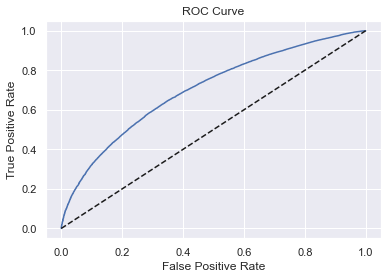

In [116]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k') # Benchmark: Predicting randomly
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [117]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds','fpr','tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992676,0.000000,0.000000
1,0.992676,0.000000,0.000012
2,0.990742,0.000000,0.000120
3,0.990685,0.000098,0.000120
4,0.989774,0.000098,0.000445


In [118]:
df_cutoffs['thresholds'][0] = 1-1/np.power(10,16)
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.992676,0.000000,0.000012
2,0.990742,0.000000,0.000120
3,0.990685,0.000098,0.000120
4,0.989774,0.000098,0.000445


<img src="score_from_prob.png" alt="drawing" width="600"/>

In [119]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds']))-min_sum_coef)*((max_score-min_score)/(max_sum_coef-min_sum_coef))+min_score).round()

In [120]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3227.0
1,0.992676,0.000000,0.000012,796.0
2,0.990742,0.000000,0.000120,778.0
3,0.990685,0.000098,0.000120,778.0
4,0.989774,0.000098,0.000445,771.0


In [121]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992676,0.000000,0.000012,796.0
2,0.990742,0.000000,0.000120,778.0
3,0.990685,0.000098,0.000120,778.0
4,0.989774,0.000098,0.000445,771.0


In [122]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17332,0.493683,0.999411,0.999952,419.0
17333,0.492069,0.999509,0.999952,419.0
17334,0.488299,0.999509,0.999976,418.0
17335,0.387627,1.000000,0.999976,386.0
17336,0.365844,1.000000,1.000000,379.0


In [123]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p,1,0).sum()

In [124]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992676,0.000000,0.000012,796.0,1,93256,0.000011,0.999989
2,0.990742,0.000000,0.000120,778.0,10,93247,0.000107,0.999893
3,0.990685,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989774,0.000098,0.000445,771.0,38,93219,0.000407,0.999593


In [125]:
def get_min_row_given_pnd(p):
    return df_cutoffs.loc[df_cutoffs['thresholds'] == df_cutoffs.loc[df_cutoffs['thresholds']>=p,:]['thresholds'].min(),:]

In [126]:
def get_min_row_given_cs(cs):
    return df_cutoffs.loc[df_cutoffs['thresholds'] == df_cutoffs.loc[df_cutoffs['Score']>=cs,:]['thresholds'].min(),:]

In [127]:
def get_min_row_given_ar(ar):
    return df_cutoffs.loc[df_cutoffs['thresholds'] == df_cutoffs.loc[df_cutoffs['Approval Rate']<ar,:]['thresholds'].min(),:]

In [128]:
get_min_row_given_pnd(0.9) #10% PD

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5316,0.900051,0.276251,0.568613,589.0,50048,43209,0.536667,0.463333


In [129]:
get_min_row_given_pnd(0.95) # 5% PD

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1173,0.950004,0.057998,0.228105,646.0,19539,73718,0.209518,0.790482


In [130]:
get_min_row_given_cs(670) #670 CS

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
569,0.962681,0.027576,0.141296,670.0,12018,81239,0.12887,0.87113


In [131]:
get_min_row_given_ar(0.14)

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
631,0.961053,0.03052,0.152877,666.0,13010,80247,0.139507,0.860493
